In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [48]:
data = pd.read_csv("data/actual/30-A=0.csv")
data = data.iloc[:,1:]
vars = list(data.columns)
n_vars = len(vars)

In [6]:
import sys
from pathlib import Path
import os
code_path = Path(os.getcwd())


In [49]:
path = code_path.joinpath('data/actual')
files = [f for f in os.listdir(path) if os.path.isfile(path.joinpath(f)) and Path(f).suffix == '.csv' ]

In [50]:
files

['30-A=0.csv',
 '30-B=0.csv',
 '50-E=2.csv',
 '70-D=-2.csv',
 '100.csv',
 '30-C=1.csv',
 '70-F=0.csv',
 '200.csv',
 '70-E=2-F=2.csv',
 '30-C=0.csv',
 '70-C=1-D=0.csv',
 '50-F=2.csv',
 '70-D=1.csv',
 '50-F=-1.5.csv',
 '50-A=1.3.csv',
 '70-E=0.csv',
 'combined_noint.csv']

In [45]:
data_files = {i: pd.read_csv(path.joinpath(file)).iloc[:,1:] for i, file in enumerate(files)}

In [32]:
colors = np.random.randint(0,255,(n_vars,3))/255
print(colors)

[[0.16470588 0.5372549  0.34117647]
 [0.29411765 0.82352941 0.34117647]
 [0.7254902  0.4627451  0.51372549]
 [0.58039216 0.52941176 0.29411765]
 [0.69803922 0.47058824 0.45490196]
 [0.25882353 0.50980392 0.63529412]]


In [33]:
colors = np.array([[0.62745098, 0.07058824, 0.01960784],
 [0.1372549,  0.93333333, 0.96470588],
 [0.45490196, 0.13333333 ,0.8627451 ],
 [0.71764706, 0.79215686 ,0.27058824],
 [0.54509804, 0.59607843 ,0.21960784],
 [0.79215686, 0.39215686, 0.2745098 ]])


In [11]:
var = [np.var(data_file) for data_file in data_files.values()]

In [12]:
def compare_stats(stat, n, vars):
    n_stat = stat[:,n]
    rest_stat = stat[:, [i for i in range(stat.shape[1]) if i != n]]
    for i in range(len(stat)):
        plt.plot(range(len(stat)),stat[:,i],'-o' , color=colors[i],label=vars[i])
    plt.legend()
    plt.show()
    plt.close()
    idx = np.argsort(n_stat)
    for i in range(len(stat)):
        if i != n:
            plt.plot(n_stat[idx],stat[:,i][idx],'-o', color=colors[i],label=vars[i])
    plt.legend(loc=10)
    plt.show()
    plt.close()

In [205]:
# 1, 6
mi = 0
for i in range(1000): 
    mi += sf.mutual_info_regression(data_files[1]['B'].to_numpy().reshape(-1, 1),data_files[6]['B'].to_numpy()[np.random.randint(0,70,50)])
print(mi/1000)

[0.02598675]


In [51]:
# Mutual information score
import sklearn.feature_selection as sf

mutual_score = np.zeros((n_vars,n_vars))

for i in range(n_vars):
    for j in range(n_vars):
        x = np.array(data[vars[i]]).reshape((-1,1))
        y = np.array(data[vars[j]])
        mutual_score[i,j] = np.round(sf.mutual_info_regression(x,y),10)

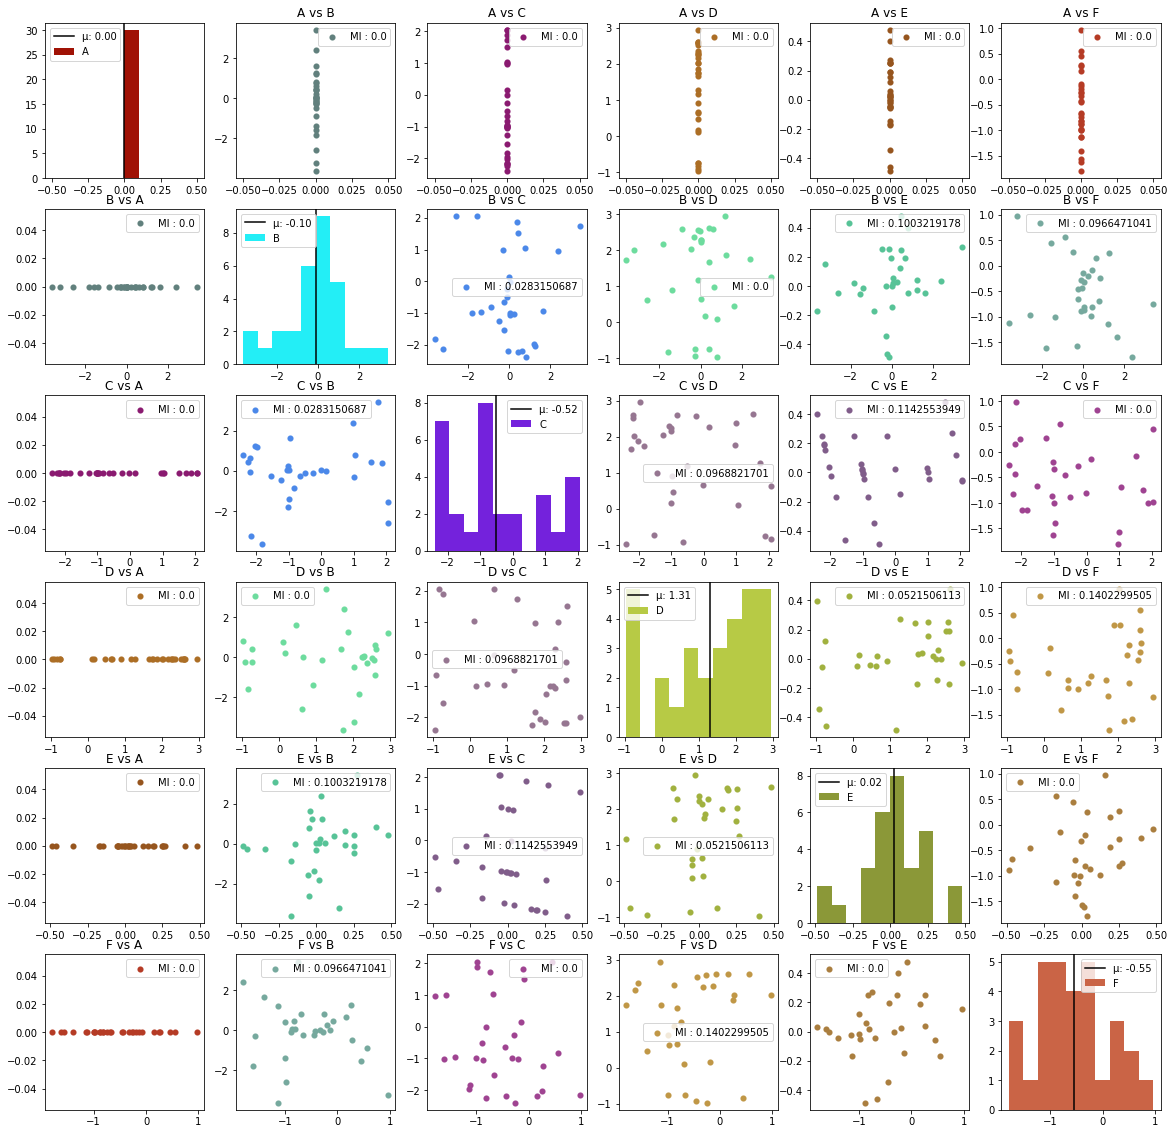

In [52]:
# Pairwise plots
fig, axs = plt.subplots(n_vars,n_vars,figsize=(20,20))


for i,axs_i in enumerate(axs):
    for j,ax in enumerate(axs_i):
        if i != j:
            ax.scatter(data[vars[i]],data[vars[j]],linewidths =0.1,color=(colors[i]+colors[j])/2)
            ax.set_title(f'{vars[i]} vs {vars[j]}')
            ax.legend(labels=[f'MI : {mutual_score[i,j]}'])
        else:
            ax.axvline(np.mean(data[vars[i]]), color='black')
            ax.hist(data[vars[i]],color=colors[i])
            ax.legend(labels=[ f'μ: {np.mean(data[vars[i]]):.2f}', vars[i]])

In [76]:
np.arange(-100,100,1)

array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
        -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
        -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
        -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
        -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
        -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
        -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
        -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
        -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
         -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
         10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   

<class 'numpy.ndarray'>


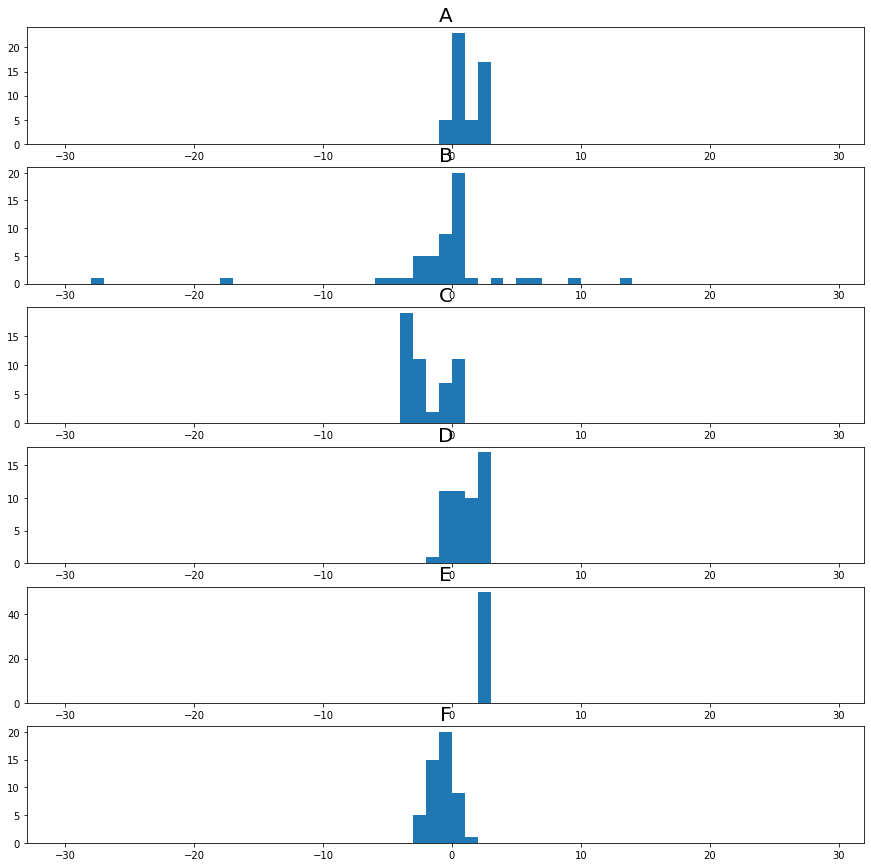

In [12]:
# Normal hists
fig, axs = plt.subplots(n_vars,figsize=(15,15))
print(type(axs))
for i,ax in enumerate(axs):
    ax.hist(data[vars[i]],np.arange(-30,30,1))
    ax.set_title(vars[i], fontsize = 20)

In [18]:
np.var(data['B'][data['B'] > -10])

9.691345840550136

In [24]:
# Linear Correlation
corre_matrix = np.zeros((n_vars,n_vars))
for i in range(n_vars):
    for j in range(n_vars):
        corre_matrix[i,j] = np.round(np.corrcoef(data[vars[i]],data[vars[j]])[0,1],3)
corre_matrix

/home/kjb/python-venvs/dtu-signaler-data/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/kjb/python-venvs/dtu-signaler-data/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[1.   , 0.345, 0.083, 0.085,   nan, 0.368],
       [0.345, 1.   , 0.115, 0.073,   nan, 0.189],
       [0.083, 0.115, 1.   , 0.103,   nan, 0.04 ],
       [0.085, 0.073, 0.103, 1.   ,   nan, 0.283],
       [  nan,   nan,   nan,   nan,   nan,   nan],
       [0.368, 0.189, 0.04 , 0.283,   nan, 1.   ]])

In [6]:
def MI(x,y,Nbins=21, names=None):
    bins = np.linspace(np.min(x),np.max(x),Nbins)
    eps=np.spacing(1)
    x_marginal = np.histogram(x,bins=bins)[0]
    x_marginal = x_marginal/x_marginal.sum()
    y_marginal = np.array(np.histogram(y,bins=bins)[0])
    y_marginal = y_marginal/y_marginal.sum()
    xy_joint = np.array(np.histogram2d(x,y,bins=(bins,bins))[0])
    xy_joint = xy_joint/xy_joint.sum()
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(xy_joint.T,origin='lower')
    plt.title('joint')
    plt.subplot(1,2,2)
    plt.imshow((x_marginal[:,None]*y_marginal[None,:]).T,origin='lower')
    plt.title('product of marginals')
    mi=np.sum(xy_joint*np.log(xy_joint/(x_marginal[:,None]*y_marginal[None,:]+eps)+eps))
    if names is None:
        plt.suptitle(f'Mutual information: {mi}')
    else:
        plt.suptitle(f'Mutual information between {names[0]}, {names[1]}: {mi:.3f}')
        plt.savefig(f'./img/{names[0]}-{names[1]}.png')
    return(mi)

<ipython-input-6-7abf94bd3d12>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


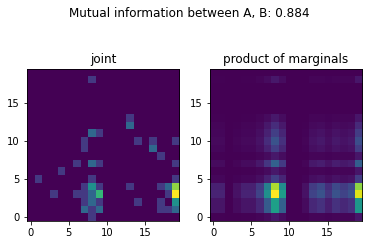

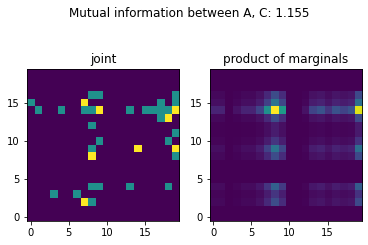

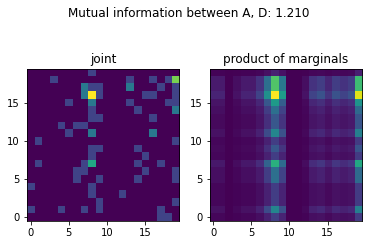

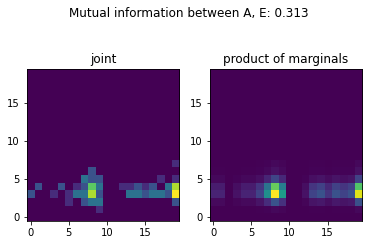

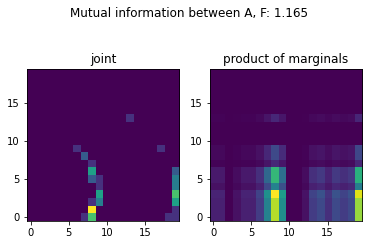

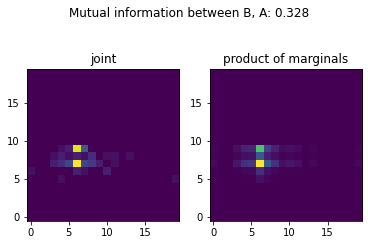

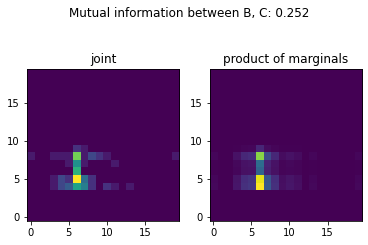

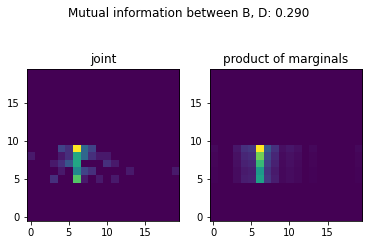

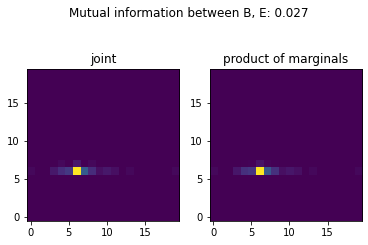

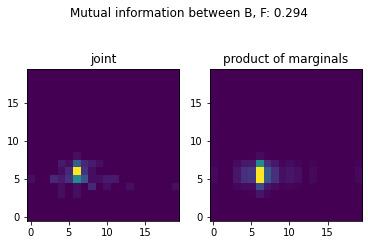

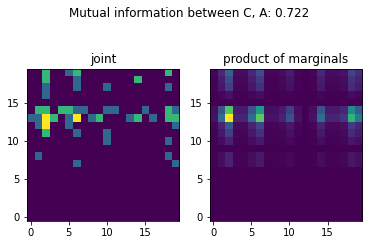

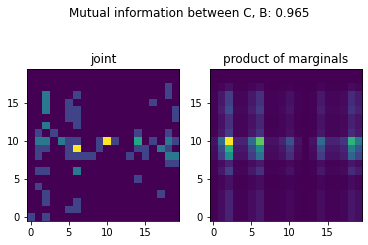

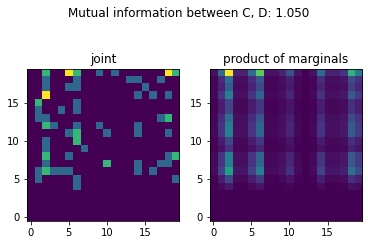

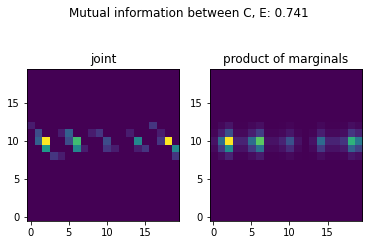

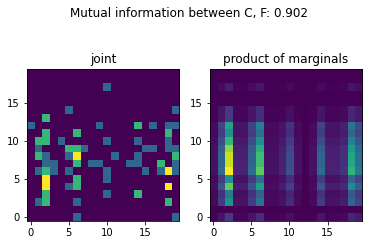

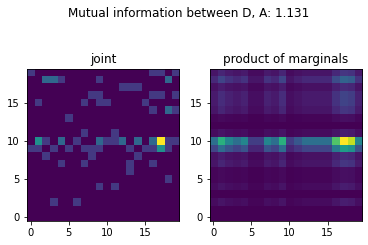

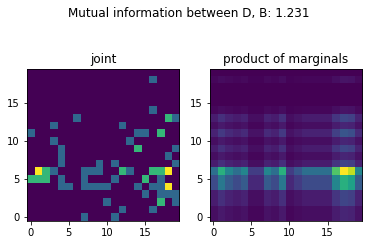

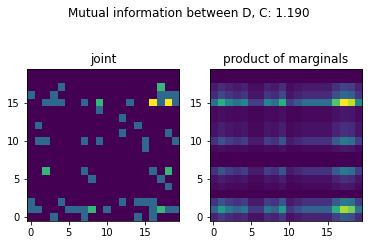

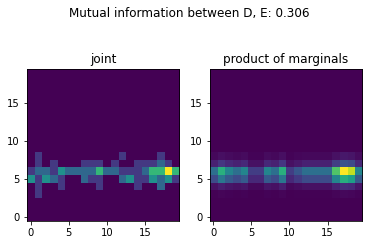

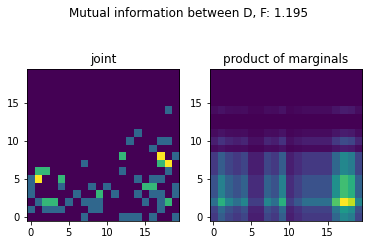

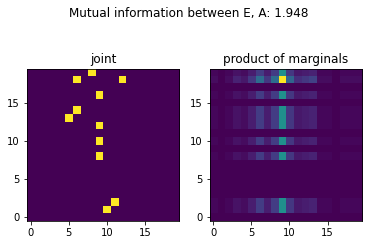

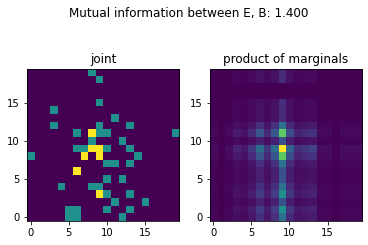

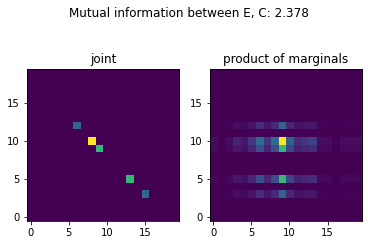

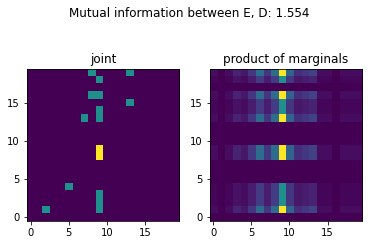

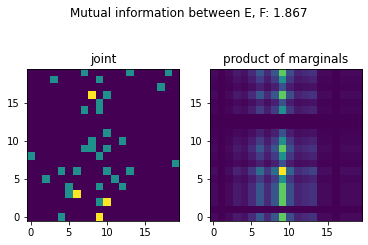

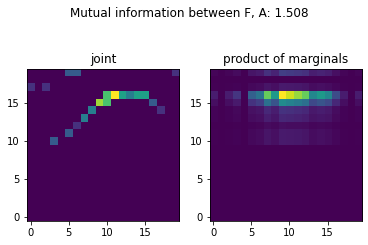

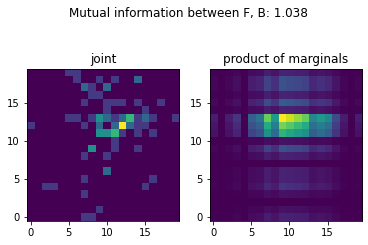

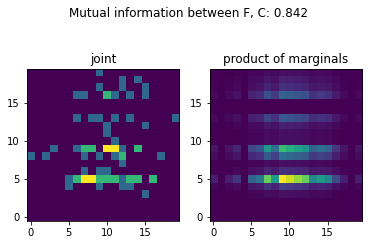

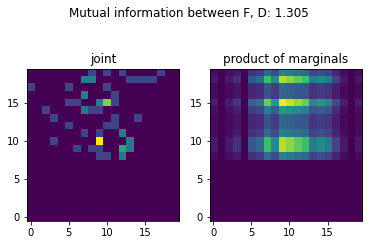

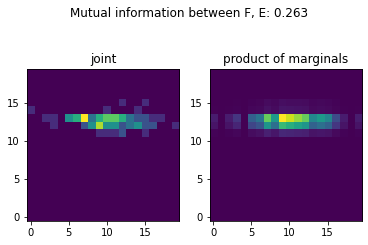

In [7]:
mi = np.zeros((n_vars,n_vars))
names = np.zeros((n_vars,n_vars)).tolist()
for key_i, i in enumerate(vars):
    n = names[key_i]
    for key_j, j in enumerate(vars):
        if j!=i:
            mi[key_i,key_j] = MI(data[i], data[j], names=[i,j])
        n[key_j] = (i,j)

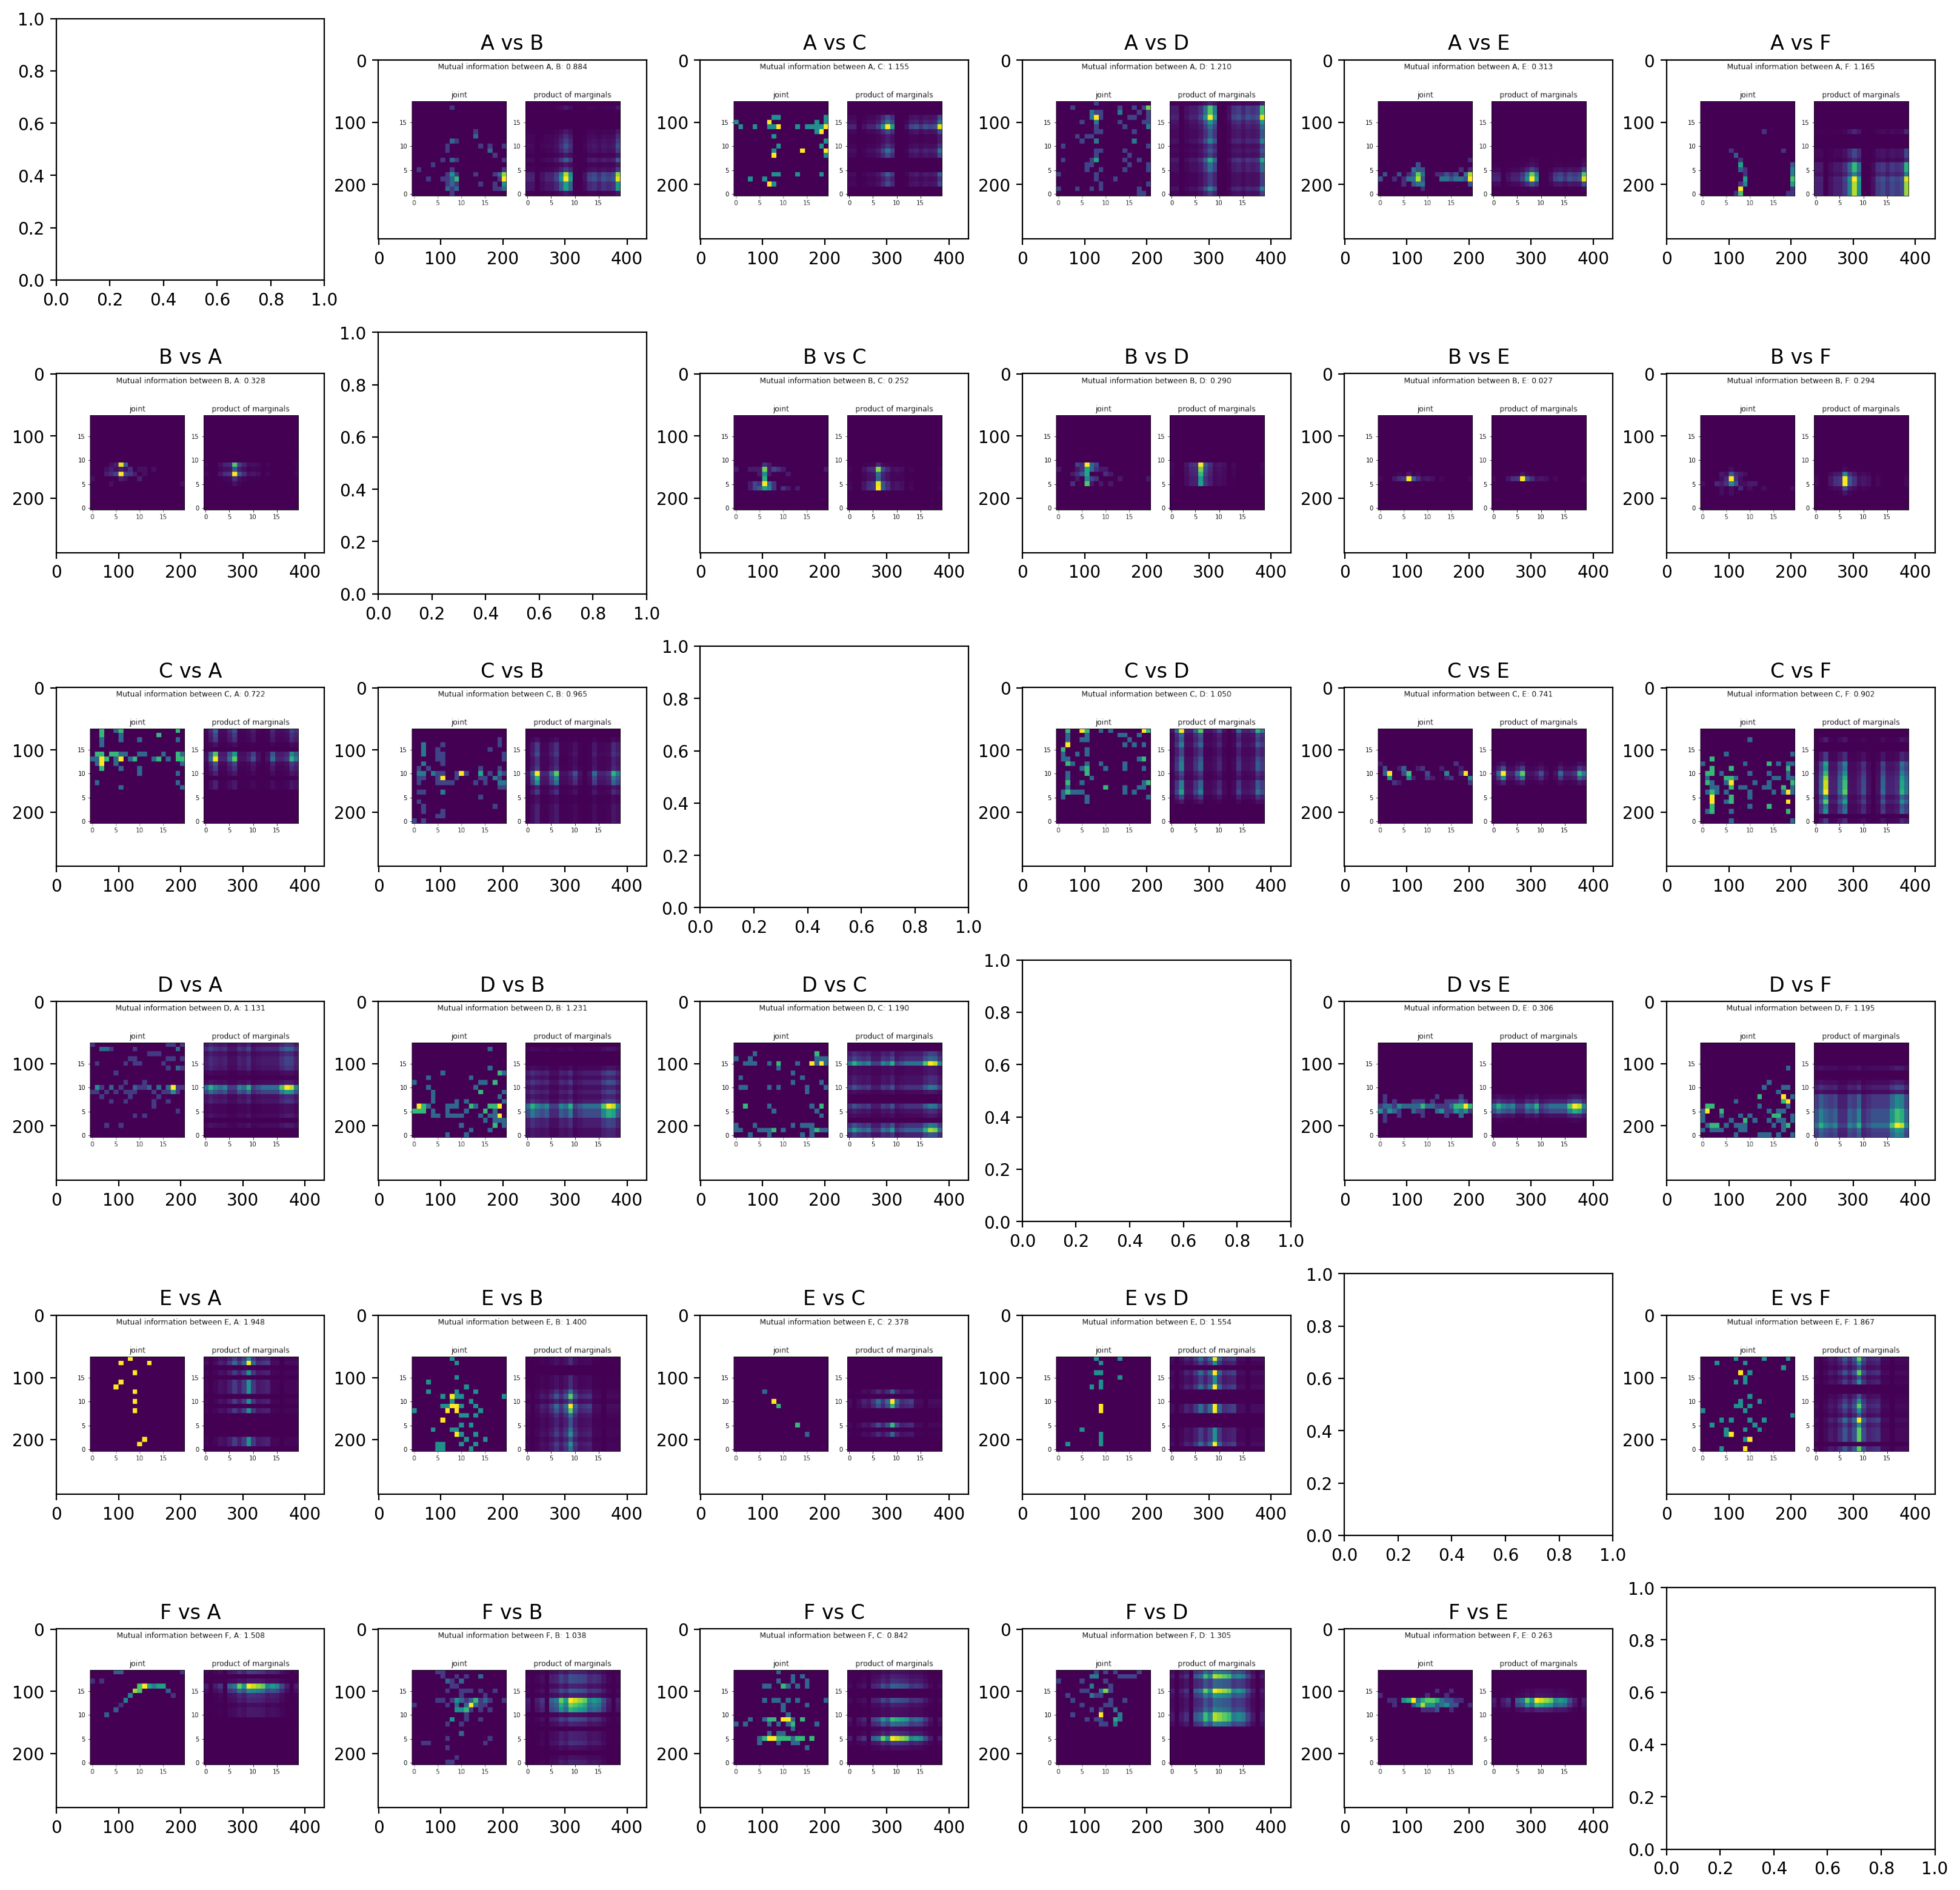

In [8]:
fig, axs = plt.subplots(n_vars,n_vars,figsize=(20,20),dpi=200)

for i,axs_i in enumerate(axs):
    for j,ax in enumerate(axs_i):
        if i != j:
            ax.imshow(plt.imread(f'./img/{vars[i]}-{vars[j]}.png'))
            ax.set_title(f'{vars[i]} vs {vars[j]}')

In [63]:
import sklearn.feature_selection as sf
mutal_score_M = np.zeros((n_vars,n_vars))
for i in range(n_vars):
    for j in range(n_vars):
        x = np.array(data[vars[i]]).reshape((-1,1))
        y = np.array(data[vars[j]])
        mutal_score_M[i,j] = np.round(sf.mutual_info_regression(x,y),2)

print(mutal_score_M)

[[3.34 0.11 0.   0.13 0.14 1.55]
 [0.11 3.34 0.08 0.13 0.   0.17]
 [0.   0.08 3.34 0.   0.15 0.  ]
 [0.13 0.13 0.   3.34 0.06 0.22]
 [0.14 0.   0.15 0.06 3.34 0.13]
 [1.55 0.17 0.   0.22 0.13 3.34]]
